<style></style>
<h1>Cyfrowe przetwarzanie sygnałów i obrazów</h1>
<h2>Przetwarzanie i analiza sygnału EKG</h2>
<b>Autorki:</b> Barbara Parzonka 263955, Joanna Zoglowek 264452
<br><br>
<b>Ćwiczenie 12.</b>
<br>
Naszym celem jest poprawa jakości obrazu za pomocą kolejnego
stosowania różnych przekształceń i filtrów. Zastosuj złożone, wieloetapowe podejście do poprawy jakości przedstawione na wykładzie pt. „Filtracja w dziedzinie przestrzennej”.<br>
<b>Dane:</b> bonescan.tif
<br>
Zastosowano podejście opisane na wykładzie.

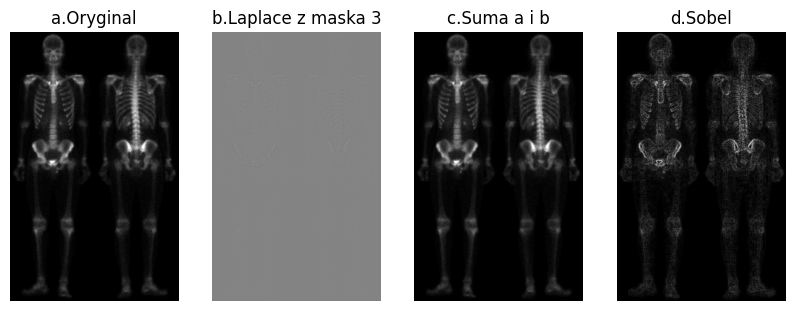

In [54]:
%run functions.ipynb
from skimage.filters import laplace
data_path='../data/'
filename='bonescan.tif'
image_path=data_path+filename
size=3
img=Image.open(image_path).convert('L')
image = np.array(img, dtype=np.float32)
laplace_image=laplace(image,size)
laplace_image=normalize_image(laplace_image)
suma=laplace_image+img
sobel=sobel_filter2(image)
usrednienie=filtr_usredniajacy(sobel, 5)
usrednienie=normalize_image(usrednienie)
multiplication=usrednienie*laplace_image
sumag=image+multiplication
c=1
gamma=0.5
tp=c*(sumag**gamma)

images=[img, laplace_image,suma, sobel]
labels=['a.Oryginal',f'b.Laplace z maska {size}', 'c.Suma a i b','d.Sobel']
images2=[usrednienie, multiplication, sumag,tp]
lables2=['e.Filtr usredniajacy', 'f.Wymnozenie','g.Suma a i f','h.Transformacja potęgowa']
show_multi_side_by_side(images,labels)
show_multi_side_by_side(images2,lables2)
